In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv('assets/cleaned_spotify_data.csv')

In [15]:
df.head()

,dates,names,monthly_listeners,popularity,followers,genres,first_release_year,last_release_year,playlists_found
0,2024-04-01,stayc,3049521.0,63,1782552,"k-pop, k-pop girl group",2020,2024,K-Pop ON! (온)
1,2024-04-01,langhorne slim,1060777.0,51,163686,"anti-folk, indie folk, modern folk rock, new a...",2008,2023,Sunrise Run
2,2024-04-01,hontoni,119199.0,35,60,NaN,2021,2024,Meditate to the Sounds of Nature
3,2024-04-01,d'verti,46999.0,29,42,NaN,2022,2024,Meditate to the Sounds of Nature
4,2024-04-01,luke bryan,10460890.0,76,8487512,"contemporary country, country, country road, m...",2007,2023,Sunrise Run


### Data Splitting

In [62]:
y = df['monthly_listeners']
X = df.drop(['monthly_listeners', 'dates', 'names', 'genres', 'playlists_found', 'first_release_year', 'last_release_year'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [64]:
X_train

,popularity,followers
18694,29,24186
16449,35,5
3594,39,1322
22792,56,1114548
5365,73,6396889
...,...,...
12119,29,1171
24423,69,569007
14147,83,4634414
23320,37,265


### Linear Regression

In [66]:
lr = LinearRegression().fit(X_train, y_train)

In [67]:
# recall step. Testing model on trained data
y_lr_train_pred = lr.predict(X_train)

# testing step. Testing model on unseen data
y_lr_test_pred = lr.predict(X_test)

In [68]:
y_train

18694       13010.0
16449      129980.0
3594       174096.0
22792     2255559.0
5365     16986046.0
            ...    
12119       68007.0
24423    15828796.0
14147    19764628.0
23320      146891.0
5640     59588927.0
Name: monthly_listeners, Length: 21937, dtype: float64

In [70]:
y_lr_train_pred

array([-1584504.24404618,  -101767.20749764,   903236.55162246, ...,
       16331813.72088059,   400357.31699008, 14641898.65914112])

In [71]:
y_lr_test_pred

array([29699017.26295938,  1452491.16219554, -2356485.87011437, ...,
        3161560.20987373,  1404292.92925549,   722359.49201619])

### Evaluate Model Performance

In [72]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [94]:
print("Linear Regression MSE (Train):", lr_train_mse)
print("Linear Regression R2 (Train):", lr_train_r2)
print("Linear Regression MSE (Test):", lr_test_mse)
print("Linear Regression R2 (Test):", lr_test_r2)

Linear Regression MSE (Train): 39056934059484.86
Linear Regression R2 (Train): 0.7434283300793755
Linear Regression MSE (Test): 38462772904075.05
Linear Regression R2 (Test): 0.7299326926405358


### Testing Ridge/Lasso Model

In [77]:
from sklearn.linear_model import Ridge
rg = Ridge().fit(X_train, y_train) 

In [78]:
# Recall
y_rg_train_pred = rg.predict(X_train)

# testing
y_rg_test_pred = rg.predict(X_test)


In [80]:
y_train

18694       13010.0
16449      129980.0
3594       174096.0
22792     2255559.0
5365     16986046.0
            ...    
12119       68007.0
24423    15828796.0
14147    19764628.0
23320      146891.0
5640     59588927.0
Name: monthly_listeners, Length: 21937, dtype: float64

In [79]:
y_rg_train_pred

array([-1584503.51540224,  -101766.72675572,   903236.86784909, ...,
       16331812.42681121,   400357.71545715, 14641897.13028818])

In [81]:
rg_train_mse = mean_squared_error(y_train, y_rg_train_pred)
rg_train_r2 = r2_score(y_train, y_rg_train_pred)

rg_test_mse = mean_squared_error(y_test, y_rg_test_pred)
rg_test_r2 = r2_score(y_test, y_rg_test_pred)

In [95]:
print("Ridge Regression MSE (Train):", rg_train_mse)
print("Ridge Regression R2 (Train):", rg_train_r2)
print("Ridge Regression MSE (Test):", rg_test_mse)
print("Ridge Regression R2 (Test):", rg_test_r2)

Ridge Regression MSE (Train): 39056934059485.336
Ridge Regression R2 (Train): 0.7434283300793724
Ridge Regression MSE (Test): 38462772877001.73
Ridge Regression R2 (Test): 0.7299326928306318


### Testing Decision Tree Regressoin

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train) 

In [88]:
# recall
y_tree_train_pred = tree.predict(X_train)

# testing
y_tree_test_pred = tree.predict(X_test)

In [101]:
y_test

26903    64317144.0
8510       138135.0
13111       22843.0
1652     59506442.0
10884      668526.0
            ...    
20491       22280.0
7529       170046.0
1513       656789.0
19219      315506.0
23812      279043.0
Name: monthly_listeners, Length: 5485, dtype: float64

In [99]:
y_tree_test_pred

array([6.4254153e+07, 1.3654600e+05, 4.5855000e+04, ..., 6.5027400e+05,
       3.6867600e+05, 8.2503000e+04])

In [97]:
# Evaluation
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_test_r2 = r2_score(y_test, y_tree_test_pred)

In [98]:
print("Decision Tree Regression MSE (Train):", tree_train_mse)
print("Decision Tree Regression R2 (Train):", tree_train_r2)
print("Decision Tree Regression MSE (Test):", tree_test_mse)
print("Decision Tree Regression R2 (Test):", tree_test_r2)

Decision Tree Regression MSE (Train): 184132050.04540598
Decision Tree Regression R2 (Train): 0.9999987904051174
Decision Tree Regression MSE (Test): 6659424254632.112
Decision Tree Regression R2 (Test): 0.9532406885614257


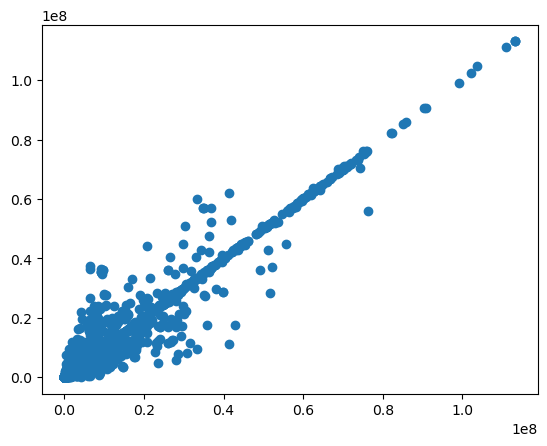

In [104]:
import matplotlib.pyplot as plt
plt.scatter(x = y_test, y = y_tree_test_pred)